In [29]:
import tensorflow as tf
import pathlib
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display

In [8]:
# Mendefinisikan base dir path (path dari dir yang akan digunakan)
base_dir = '/Users/tirtarumy/Documents/Data scientist porto/Tuberculosis Classification using MLP CNN/Data/TB'


In [9]:
# Periksa dir path
os.listdir(base_dir)

['.DS_Store', 'Positif', 'Normal']

In [10]:
# Memeriksa jumlah file pada masing-masing dir
print('Normal Dataset : ',len(os.listdir('/Users/tirtarumy/Documents/Data scientist porto/Tuberculosis Classification using MLP CNN/Data/TB/Normal')))
print('Positif Dataset : ',len(os.listdir('/Users/tirtarumy/Documents/Data scientist porto/Tuberculosis Classification using MLP CNN/Data/TB/Positif')))

Normal Dataset :  111
Positif Dataset :  150


In [11]:
# Mendefinisikan path masing2 subdir dan menggabungkannya dg path base dir
normal = os.path.join(base_dir,'Normal')
positif = os.path.join(base_dir,'Positif')

In [12]:
train_normal = os.listdir(normal)
train_positif = os.listdir(positif)

print('normal dir :',len(train_normal))
print('positif dir :',len(train_positif))

normal dir : 111
positif dir : 150


In [14]:
# Prepro
train_dataGen = ImageDataGenerator(
     validation_split = 0.2,
     rescale=1./255,
     rotation_range=5,
     horizontal_flip=True,
     vertical_flip=True,
    #  shear_range = 0.2,
     fill_mode = 'nearest'
)


In [17]:
# train data and take path to dir & generate batch of data

train_generator = train_dataGen.flow_from_directory(
        base_dir, #dir yang dilatih
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        shuffle=True,
        batch_size=8,
        subset='training',
        class_mode='binary') # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'

validation_generator = train_dataGen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        batch_size=8,
        subset='validation',
        class_mode='binary')

Found 208 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [18]:
# Memabangun model CNN

model = tf.keras.models.Sequential([
    # Lapisan konvolusi pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Lapisan konvolusi kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Lapisan konvolusi ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Lapisan konvolusi keempat
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Lapisan konvolusi kelima
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Users/tirtarumy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# Early stopping using callback to get accuracy
from tensorflow.keras.callbacks import Callback

class my_callback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self,epoch,log=None) :
    if log.get('accuracy') > 0.98 :
      print('\nfor epoch',epoch,
            '\nAccuracy has reach %2.2f%%' %(log['accuracy']*100),
            'training has been stopped')
      self.model.stop_training=True


In [22]:
# latih model dengan model.fit

history = model.fit(
      validation_generator,
      steps_per_epoch=None,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=None,
      verbose=2,
      callbacks=[my_callback()]) #Memanggil fungsi callback

Epoch 1/50


/Users/tirtarumy/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 - 9s - 1s/step - accuracy: 0.3846 - loss: 0.8160 - val_accuracy: 0.4231 - val_loss: 0.6943
Epoch 2/50
7/7 - 2s - 303ms/step - accuracy: 0.4231 - loss: 0.6992 - val_accuracy: 0.4231 - val_loss: 0.6918
Epoch 3/50
7/7 - 2s - 303ms/step - accuracy: 0.5769 - loss: 0.6904 - val_accuracy: 0.6731 - val_loss: 0.6790
Epoch 4/50
7/7 - 2s - 303ms/step - accuracy: 0.6731 - loss: 0.6622 - val_accuracy: 0.8462 - val_loss: 0.6054
Epoch 5/50
7/7 - 2s - 305ms/step - accuracy: 0.8846 - loss: 0.4735 - val_accuracy: 0.8654 - val_loss: 0.5135
Epoch 6/50
7/7 - 2s - 303ms/step - accuracy: 0.8846 - loss: 0.3417 - val_accuracy: 0.6154 - val_loss: 0.9225
Epoch 7/50
7/7 - 2s - 304ms/step - accuracy: 0.8269 - loss: 0.3841 - val_accuracy: 0.7500 - val_loss: 0.4382
Epoch 8/50
7/7 - 2s - 299ms/step - accuracy: 0.8269 - loss: 0.4188 - val_accuracy: 0.8846 - val_loss: 0.3797
Epoch 9/50
7/7 - 2s - 302ms/step - accuracy: 0.8654 - loss: 0.4116 - val_accuracy: 0.8654 - val_loss: 0.4256
Epoch 10/50
7/7 - 2s - 307ms/step

In [ ]:
model.save('tb_cnn_model.h5')

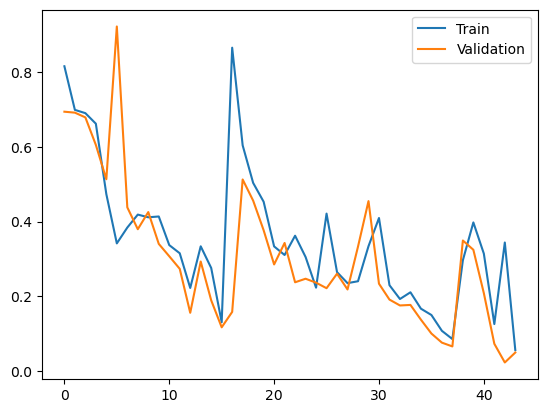

In [24]:
# showing image sample
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpig

plt.title('Training and Validation Loss')
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()



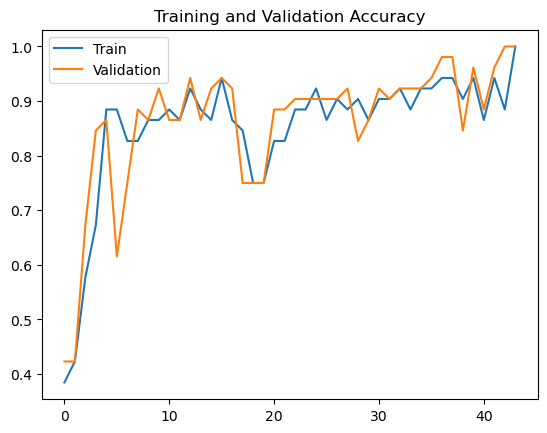

In [26]:
# showing image sample
%matplotlib inline
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()


In [ ]:
# Membuat widget untuk unggahan file
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_upload_change(change):
    # Mendapatkan file yang diunggah
    uploaded_file = list(change['new'].values())[0]
    content = uploaded_file['content']
    
    try:
        # Memuat gambar dan mengubah ukuran
        img = image.load_img(io.BytesIO(content), target_size=(150, 150))
        print("Gambar berhasil dimuat dan diubah ukurannya.")
        
        # Menampilkan gambar
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        # Preprocessing gambar
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        print("Gambar berhasil diproses untuk prediksi.")
        
        # Memprediksi kelas gambar
        classes = model.predict(images, batch_size=8)
        print("Prediksi berhasil dilakukan.")
        
        print(uploaded_file['name'])
        if classes[0][0] == 0:
            print('Normal')
        else:
            print('Positif')
    
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Menyambungkan fungsi ke widget
upload_widget.observe(on_upload_change, names='value')

# Menampilkan widget
display(upload_widget)

FileUpload(value=(), accept='image/*', description='Upload')